This file will make the pairwise comparison plots for the relevant appendix.

In [1]:
import numpy as np
import pandas as pd
import biomass as bm
from scipy.stats import linregress
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the data
data = pd.read_csv('data_statevariables.csv')

In [3]:
# Now add a column for predicted numerical biomass data
data['pBnum'] = np.zeros(len(data))
# Iterate through each row and append the biomass information
for index, row in data.iterrows():
    data.loc[index,'pBnum'] = bm.biomass(row)

# General plot setup

In [5]:
# Choose color scheme
cm = 'winter'#'viridis'
# Get max and min species richness for colour scheme
smin = np.min(data['S'])
smax = np.max(data['S'])
# Set up normalization
norm = plt.Normalize(np.log(smin),np.log(smax))
# Get list of site types
stype = data['Type'].unique()
# Make marker list. Has to be same length as stype
mlist = ['s','^','D','o','X']

# Pairwise amongst state variables

In [27]:
def plot(x,y,displayl=False):
    '''
    This will be the generic function for plotting all the pairwise variables so I don't have a giant copy paste thing
    The legend can be turned off with displayl.
        '''
    fig,ax = plt.subplots(figsize=(4,4))

    # Plot data
    xdata = np.log(data[x])
    ydata = np.log(data[y])

    # Loop through each site type to put a different marker
    for m,s in zip(mlist,stype):
        inds = data['Type']==s
        # Make all colors the same, roughly halfway between smin and smax
        ax.scatter(xdata[inds],ydata[inds],marker=m,c=np.ones(inds.sum())*4,cmap=cm,norm=norm,edgecolor='0.3') 

    # Set range
    ymin = np.floor(np.min(ydata))
    ymax = np.ceil(np.max(ydata))
    xmin = np.floor(np.min(xdata))
    xmax = np.ceil(np.max(xdata))

    ax.set_ylim(ymin,ymax)
    ax.set_xlim(xmin,xmax)

    # Labels
    ax.set_xlabel('ln(${}$)'.format(x))
    ax.set_ylabel('ln(${}$)'.format(y))

    # Legend
    # Plot a bunch of empty points. Not sure if this is the best way, but it's how I'm doing it!
    leg = {}
    for m,s in zip(mlist,stype):
        leg[s], = ax.plot([],[],c='0.3',marker=m,linestyle="None")

    # Add in regression line
    lin = linregress(xdata,ydata)
    xlin = np.linspace(xmin,xmax)
    leg['Regression'], = ax.plot(xlin,xlin*lin[0]+lin[1],zorder=0,c='0.3',lw=2)
    lcodes = np.insert(stype,0,'Regression')
    
    # Add in regression R^2
    ax.annotate(r'$R^2 = {:.3f}$'.format(lin[2]**2),(0.73,0.17),xycoords='figure fraction')
    
    if displayl:
        ax.legend([leg[s] for s in lcodes],lcodes,prop={"size":7.3})

    # Save
    fig.savefig('Figures/figS_{}.pdf'.format(x+y),bbox_inches='tight')

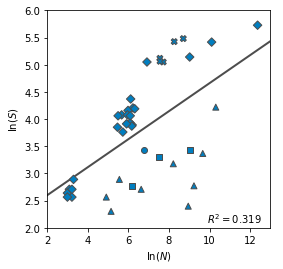

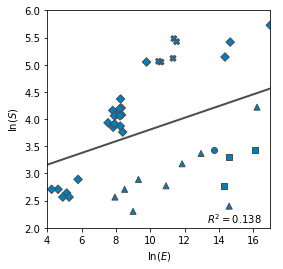

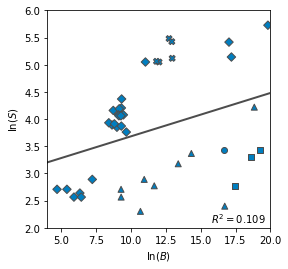

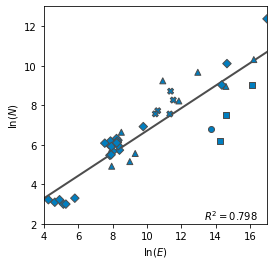

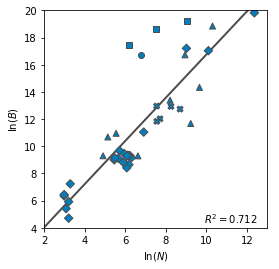

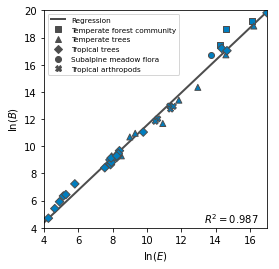

In [28]:
plot('N','S')
plot('E','S')
plot('B','S')
plot('E','N')
plot('N','B')
plot('E','B',displayl=True) # Put legend for one of them